# Description

This notebook runs some pre-analyses using spectral clustering to explore the best set of parameters to cluster `z_score_std` data version.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

3

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=3
env: OPEN_BLAS_NUM_THREADS=3
env: NUMEXPR_NUM_THREADS=3
env: OMP_NUM_THREADS=3


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
INITIAL_RANDOM_STATE = 30000

# Z-score standardized data

In [6]:
INPUT_SUBSET = "z_score_std"

In [7]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [8]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

In [9]:
data = pd.read_pickle(input_filepath)

In [10]:
data.shape

(3749, 987)

In [11]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.553743,1.851060,-0.095721,0.931603,-0.515196,1.371264,-0.413165,0.729668,0.546338,0.901153,...,1.148776,1.649018,-1.375952,2.203063,0.810199,-0.987048,0.277710,-0.607613,0.572376,-0.660846
100002_raw-Energy,-1.313905,-0.421015,-0.310524,-0.201978,0.233028,0.693838,0.084129,0.572439,0.217866,1.296973,...,0.165430,0.799276,-0.361989,-0.008253,2.063780,-0.930765,-0.147007,1.601938,-0.273553,-0.560822
100003_raw-Protein,-0.645622,-0.997845,0.249039,0.256499,0.422357,0.829189,-0.169004,0.511550,0.002389,-0.057200,...,1.016791,1.019488,-2.148844,-0.065130,0.041052,-0.836118,-0.320571,1.325519,-0.341494,-0.495786
100004_raw-Fat,-0.913924,-1.837183,0.012095,-1.301315,0.205794,1.129114,0.019985,0.376660,-0.810272,0.843611,...,0.544266,0.576714,0.281731,-0.218963,1.258957,-1.131924,0.378545,0.842047,-0.622194,-0.160058
100005_raw-Carbohydrate,-0.523004,0.131379,-0.097802,-0.030526,-0.021500,-0.219116,0.668229,0.365700,1.102347,0.845625,...,-0.344740,0.079274,0.253427,0.236474,1.033895,-0.229105,0.364793,1.776714,0.190531,-1.459641


# Clustering

In [12]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score

## `gamma` parameter

### Using default value (`gamma=1.0`)

In [13]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        #         eigen_tol=1e-2,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=1.00,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

/mnt/software/miniconda3/envs/phenoplier/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/mnt/software/miniconda3/envs/phenoplier/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/mnt/software/miniconda3/envs/phenoplier/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/mnt/software/miniconda3/envs/phenoplier/lib/python3.8/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/mnt/software/miniconda3/envs/phenoplier/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:311: RuntimeWarning: invalid value encountered in add
  distances += XX
/mnt/software/miniconda3/envs/phenoplier/lib/python3.8/site-

In [14]:
# show number of clusters and their size
pd.Series(part).value_counts()

0    3749
dtype: int64

The algorithm does not work with the default `gamma=1.0`. Other values for this parameter should be explored.

### Using `gamma=0.01`

In [15]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        eigen_tol=1e-3,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=0.01,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

In [16]:
# show number of clusters and their size
pd.Series(part).value_counts()

0    3748
1       1
dtype: int64

For values around `gamma=0.01` the algorithm takes a lot of time to converge (here I used `eigen_tol=1e-03` to force convergence).

### Using `gamma=0.001`

In [17]:
with warnings.catch_warnings():
    warnings.filterwarnings("always")

    clus = SpectralClustering(
        eigen_solver="arpack",
        #         eigen_tol=1e-3,
        n_clusters=2,
        n_init=1,
        affinity="rbf",
        gamma=0.001,
        random_state=INITIAL_RANDOM_STATE,
    )

    part = clus.fit_predict(data)

In [18]:
# show number of clusters and their size
pd.Series(part).value_counts()

0    3747
1       2
dtype: int64

In [19]:
# From sklearn website:
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
# Negative values generally indicate that a sample has been assigned to the wrong cluster,
# as a different cluster is more similar
silhouette_score(data, part)

0.6144958831623549

In [20]:
# From sklearn website:
# The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion. Higher is better.
calinski_harabasz_score(data, part)

22.767909596877978

For values around `gamma=0.001` now the algorithm converges. This suggests smaller values should be explored for this parameter.

## Extended test

Here I run some test across several `k` and `gamma` values; then I check how results perform with different clustering quality measures.

In [21]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_RANGE"] = [2, 4, 6, 8, 10, 20, 30, 40, 50, 60]
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10
CLUSTERING_OPTIONS["GAMMAS"] = [
    1e-03,
    #     1e-04,
    #     1e-05,
    1e-05,
    #     1e-06,
    #     1e-07,
    #     1e-08,
    #     1e-09,
    1e-10,
    #     1e-11,
    #     1e-12,
    #     1e-13,
    #     1e-14,
    1e-15,
    1e-17,
    1e-20,
    1e-30,
    1e-40,
    1e-50,
]
CLUSTERING_OPTIONS["AFFINITY"] = "rbf"

display(CLUSTERING_OPTIONS)

{'K_RANGE': [2, 4, 6, 8, 10, 20, 30, 40, 50, 60],
 'N_REPS_PER_K': 5,
 'KMEANS_N_INIT': 10,
 'GAMMAS': [0.001, 1e-05, 1e-10, 1e-15, 1e-17, 1e-20, 1e-30, 1e-40, 1e-50],
 'AFFINITY': 'rbf'}

In [22]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in CLUSTERING_OPTIONS["K_RANGE"]:
    for gamma_value in CLUSTERING_OPTIONS["GAMMAS"]:
        for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
            clus = SpectralClustering(
                eigen_solver="arpack",
                n_clusters=k,
                n_init=CLUSTERING_OPTIONS["KMEANS_N_INIT"],
                affinity=CLUSTERING_OPTIONS["AFFINITY"],
                gamma=gamma_value,
                random_state=random_state,
            )

            method_name = type(clus).__name__
            CLUSTERERS[f"{method_name} #{idx}"] = clus

            random_state = random_state + 1
            idx = idx + 1

In [23]:
display(len(CLUSTERERS))

450

In [24]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('SpectralClustering #0',
 SpectralClustering(eigen_solver='arpack', gamma=0.001, n_clusters=2,
                    random_state=30000))

('SpectralClustering #1',
 SpectralClustering(eigen_solver='arpack', gamma=0.001, n_clusters=2,
                    random_state=30001))

In [25]:
clustering_method_name = method_name
display(clustering_method_name)

'SpectralClustering'

## Generate ensemble

In [26]:
import tempfile
from clustering.ensembles.utils import generate_ensemble

In [27]:
# generate a temporary folder where to store the ensemble and avoid computing it again
ensemble_folder = Path(
    tempfile.gettempdir(),
    f"pre_cluster_analysis",
    clustering_method_name,
).resolve()
ensemble_folder.mkdir(parents=True, exist_ok=True)

In [28]:
ensemble_file = Path(
    ensemble_folder,
    generate_result_set_name(
        CLUSTERING_OPTIONS, prefix=f"ensemble-{INPUT_SUBSET}-", suffix=".pkl"
    ),
)
display(ensemble_file)

PosixPath('/tmp/pre_cluster_analysis/SpectralClustering/ensemble-z_score_std-AFFINITY_rbf-GAMMAS_0001_1e_05_1e_10_1e_15_1e_17_1e_20_1e_30_1e_40_1e_50-KMEANS_N_INIT_10-K_RANGE_2_4_6_8_10_20_30_40_50_60-N_REPS_PER_K_5.pkl')

In [29]:
if ensemble_file.exists():
    display(f"Ensemble file exists")
    ensemble = pd.read_pickle(ensemble_file)
else:
    ensemble = generate_ensemble(
        data,
        CLUSTERERS,
        attributes=["n_clusters", "gamma"],
    )

    ensemble.to_pickle(ensemble_file)

100%|██████████| 450/450 [19:28<00:00,  2.60s/it]


In [30]:
ensemble.shape

(450, 4)

In [31]:
ensemble.head()

,clusterer_params,partition,n_clusters,gamma
clusterer_id,,,,
SpectralClustering #0,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #1,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #2,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #3,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001
SpectralClustering #4,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001


In [32]:
ensemble["gamma"] = ensemble["gamma"].apply(lambda x: f"{x:.1e}")

In [33]:
ensemble["n_clusters"].value_counts()

60    45
50    45
40    45
30    45
20    45
10    45
8     45
6     45
4     45
2     45
Name: n_clusters, dtype: int64

In [34]:
_tmp = ensemble["n_clusters"].value_counts().unique()
assert _tmp.shape[0] == 1
assert _tmp[0] == int(
    CLUSTERING_OPTIONS["N_REPS_PER_K"] * len(CLUSTERING_OPTIONS["GAMMAS"])
)

In [35]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    450.000000
mean      23.000000
std       19.846291
min        2.000000
25%        6.000000
50%       15.000000
75%       40.000000
max       60.000000
Name: n_clusters, dtype: float64

### Testing

In [36]:
assert ensemble_stats["min"] > 1

In [37]:
assert not ensemble["n_clusters"].isna().any()

In [38]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [39]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [40]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

In [41]:
# check that the number of clusters in the partitions are the expected ones
_real_k_values = ensemble["partition"].apply(lambda x: np.unique(x).shape[0])
display(_real_k_values)
assert np.all(ensemble["n_clusters"].values == _real_k_values.values)

clusterer_id
SpectralClustering #0       2
SpectralClustering #1       2
SpectralClustering #2       2
SpectralClustering #3       2
SpectralClustering #4       2
                           ..
SpectralClustering #445    60
SpectralClustering #446    60
SpectralClustering #447    60
SpectralClustering #448    60
SpectralClustering #449    60
Name: partition, Length: 450, dtype: int64

### Add clustering quality measures

In [42]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [43]:
ensemble.shape

(450, 5)

In [44]:
ensemble.head()

,clusterer_params,partition,n_clusters,gamma,ch_score
clusterer_id,,,,,
SpectralClustering #0,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,22.76791
SpectralClustering #1,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,22.76791
SpectralClustering #2,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,22.76791
SpectralClustering #3,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,22.76791
SpectralClustering #4,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0e-03,22.76791


# Cluster quality

In [45]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters", "gamma"]).mean()
    display(_df)

ch_score
n_clusters gamma              
2          1.0e-03   22.767910
           1.0e-05  209.860914
           1.0e-10  209.860914
           1.0e-15  209.783893
           1.0e-17    1.096791
           1.0e-20    0.938792
           1.0e-30    1.076975
           1.0e-40    1.124642
           1.0e-50    1.266566
4          1.0e-03   21.450367
           1.0e-05   94.256428
           1.0e-10   97.555611
           1.0e-15   96.760915
           1.0e-17    1.496617
           1.0e-20    1.107616
           1.0e-30    0.995029
           1.0e-40    1.041805
           1.0e-50    1.096372
6          1.0e-03   21.137810
           1.0e-05   78.537956
           1.0e-10   78.534441
           1.0e-15   77.651414
           1.0e-17    1.191033
           1.0e-20    0.954386
           1.0e-30    0.980996
           1.0e-40    0.976958
           1.0e-50    1.355085
8          1.0e-03   18.498460
           1.0e-05   64.154566
           1.0e-10   64.136390
           1.0e-15   63.938455
           1.0e-17    1.484465
           1.0e-20    0.931286
           1.0e-30    1.417041
           1.0e-40    0.933172
           1.0e-50    0.922697
10         1.0e-03   19.592955
           1.0e-05   53.690013
           1.0e-10   53.635724
           1.0e-15   53.413078
           1.0e-17    1.185060
           1.0e-20    1.133346
           1.0e-30    0.904290
           1.0e-40    1.135910
           1.0e-50    1.035553
20         1.0e-03   16.776902
           1.0e-05   33.473616
           1.0e-10   33.600064
           1.0e-15   32.838715
           1.0e-17    1.272791
           1.0e-20    0.987720
           1.0e-30    1.031377
           1.0e-40    1.002109
           1.0e-50    0.990146
30         1.0e-03   15.275871
           1.0e-05   24.763580
           1.0e-10   24.775096
           1.0e-15   23.104899
           1.0e-17    1.349291
           1.0e-20    1.042256
           1.0e-30    1.027032
           1.0e-40    1.106742
           1.0e-50    0.969330
40         1.0e-03   14.505925
           1.0e-05   20.022179
           1.0e-10   19.738095
           1.0e-15   18.193015
           1.0e-17    1.209870
           1.0e-20    0.946206
           1.0e-30    0.943538
           1.0e-40    0.947743
           1.0e-50    0.968014
50         1.0e-03   13.172299
           1.0e-05   16.760280
           1.0e-10   16.627235
           1.0e-15   15.175624
           1.0e-17    1.321981
           1.0e-20    1.023456
           1.0e-30    1.040681
           1.0e-40    0.984202
           1.0e-50    0.983618
60         1.0e-03   12.253414
           1.0e-05   14.695319
           1.0e-10   14.771882
           1.0e-15   12.691248
           1.0e-17    1.216359
           1.0e-20    0.972915
           1.0e-30    1.015899
           1.0e-40    1.028013
           1.0e-50    1.112739

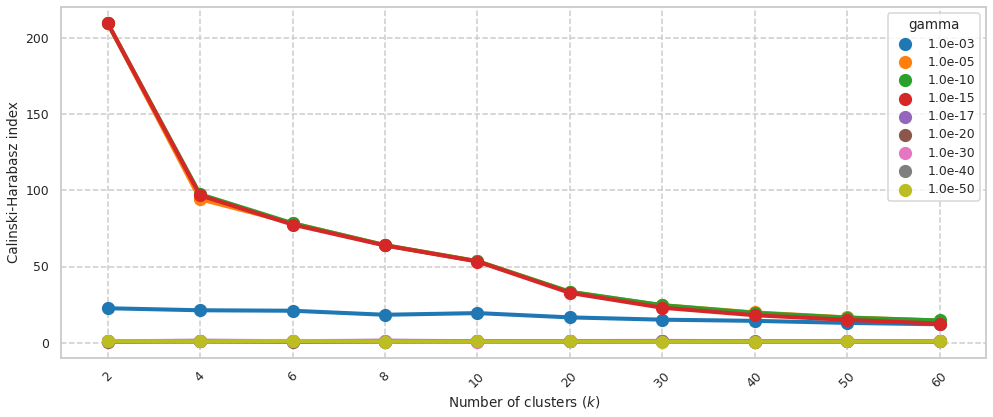

In [46]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score", hue="gamma")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [47]:
parts = ensemble.groupby(["gamma", "n_clusters"]).apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [48]:
parts.shape

(90,)

In [49]:
parts.head()

gamma    n_clusters
1.0e-03  2             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         4             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         6             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         8             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
         10            [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
dtype: object

In [50]:
parts.iloc[0].shape

(5, 3749)

In [51]:
assert np.all(
    [
        parts.loc[k].shape == (int(CLUSTERING_OPTIONS["N_REPS_PER_K"]), data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [52]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [53]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="n_clusters"
)

In [54]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

1.0e-03  2     1.000000
         40    1.000000
1.0e-10  2     1.000000
1.0e-05  8     1.000000
         4     1.000000
1.0e-10  6     1.000000
1.0e-05  2     1.000000
1.0e-10  4     1.000000
1.0e-03  10    1.000000
         4     1.000000
         6     1.000000
         8     1.000000
1.0e-10  8     0.999297
1.0e-15  2     0.996823
1.0e-05  10    0.995167
Name: n_clusters, dtype: float64

In [55]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)
parts_ari_df.index.rename(["gamma", "n_clusters"], inplace=True)

In [56]:
parts_ari_df.shape

(90, 10)

In [57]:
_n_total_parts = int(
    CLUSTERING_OPTIONS["N_REPS_PER_K"]
)  # * len(CLUSTERING_OPTIONS["GAMMAS"]))

assert int(_n_total_parts * (_n_total_parts - 1) / 2) == parts_ari_df.shape[1]

In [58]:
parts_ari_df.head()

0    1    2    3    4    5    6    7    8    9
gamma   n_clusters                                                  
1.0e-03 2           1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
        4           1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
        6           1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
        8           1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
        10          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

## Stability plot

In [59]:
parts_ari_df_plot = (
    parts_ari_df.stack().reset_index().rename(columns={"level_2": "idx", 0: "ari"})
)

In [60]:
parts_ari_df_plot.dtypes

gamma          object
n_clusters      int64
idx             int64
ari           float64
dtype: object

In [61]:
parts_ari_df_plot.head()

,gamma,n_clusters,idx,ari
0,1.0e-03,2,0,1.0
1,1.0e-03,2,1,1.0
2,1.0e-03,2,2,1.0
3,1.0e-03,2,3,1.0
4,1.0e-03,2,4,1.0


In [62]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = parts_ari_df_plot.groupby(["n_clusters", "gamma"]).mean()
    display(_df)

idx       ari
n_clusters gamma                 
2          1.0e-03  4.5  1.000000
           1.0e-05  4.5  1.000000
           1.0e-10  4.5  1.000000
           1.0e-15  4.5  0.996823
           1.0e-17  4.5 -0.003473
           1.0e-20  4.5 -0.000883
           1.0e-30  4.5 -0.002913
           1.0e-40  4.5  0.006222
           1.0e-50  4.5 -0.000429
4          1.0e-03  4.5  1.000000
           1.0e-05  4.5  1.000000
           1.0e-10  4.5  1.000000
           1.0e-15  4.5  0.955537
           1.0e-17  4.5 -0.006621
           1.0e-20  4.5  0.001797
           1.0e-30  4.5  0.001877
           1.0e-40  4.5  0.010926
           1.0e-50  4.5  0.005906
6          1.0e-03  4.5  1.000000
           1.0e-05  4.5  0.965708
           1.0e-10  4.5  1.000000
           1.0e-15  4.5  0.912725
           1.0e-17  4.5 -0.005134
           1.0e-20  4.5  0.000978
           1.0e-30  4.5  0.003517
           1.0e-40  4.5  0.001121
           1.0e-50  4.5  0.005875
8          1.0e-03  4.5  1.000000
           1.0e-05  4.5  1.000000
           1.0e-10  4.5  0.999297
           1.0e-15  4.5  0.897819
           1.0e-17  4.5 -0.004462
           1.0e-20  4.5 -0.005396
           1.0e-30  4.5  0.006540
           1.0e-40  4.5  0.001856
           1.0e-50  4.5 -0.001691
10         1.0e-03  4.5  1.000000
           1.0e-05  4.5  0.995167
           1.0e-10  4.5  0.991779
           1.0e-15  4.5  0.584365
           1.0e-17  4.5  0.002402
           1.0e-20  4.5 -0.003229
           1.0e-30  4.5  0.003600
           1.0e-40  4.5  0.002391
           1.0e-50  4.5 -0.001431
20         1.0e-03  4.5  0.879979
           1.0e-05  4.5  0.593919
           1.0e-10  4.5  0.466322
           1.0e-15  4.5  0.097219
           1.0e-17  4.5 -0.001667
           1.0e-20  4.5 -0.001352
           1.0e-30  4.5  0.000829
           1.0e-40  4.5 -0.000408
           1.0e-50  4.5  0.001220
30         1.0e-03  4.5  0.977300
           1.0e-05  4.5  0.270448
           1.0e-10  4.5  0.331568
           1.0e-15  4.5  0.037448
           1.0e-17  4.5  0.004039
           1.0e-20  4.5 -0.001232
           1.0e-30  4.5  0.001966
           1.0e-40  4.5 -0.004353
           1.0e-50  4.5  0.003151
40         1.0e-03  4.5  1.000000
           1.0e-05  4.5  0.160639
           1.0e-10  4.5  0.181697
           1.0e-15  4.5  0.032380
           1.0e-17  4.5  0.003382
           1.0e-20  4.5 -0.001444
           1.0e-30  4.5  0.000805
           1.0e-40  4.5  0.004182
           1.0e-50  4.5 -0.001834
50         1.0e-03  4.5  0.961422
           1.0e-05  4.5  0.124132
           1.0e-10  4.5  0.114571
           1.0e-15  4.5  0.029839
           1.0e-17  4.5 -0.000022
           1.0e-20  4.5  0.000376
           1.0e-30  4.5 -0.000043
           1.0e-40  4.5  0.006970
           1.0e-50  4.5  0.002384
60         1.0e-03  4.5  0.141450
           1.0e-05  4.5  0.094678
           1.0e-10  4.5  0.094576
           1.0e-15  4.5  0.027717
           1.0e-17  4.5  0.003246
           1.0e-20  4.5 -0.002344
           1.0e-30  4.5  0.002566
           1.0e-40  4.5 -0.000865
           1.0e-50  4.5  0.005663

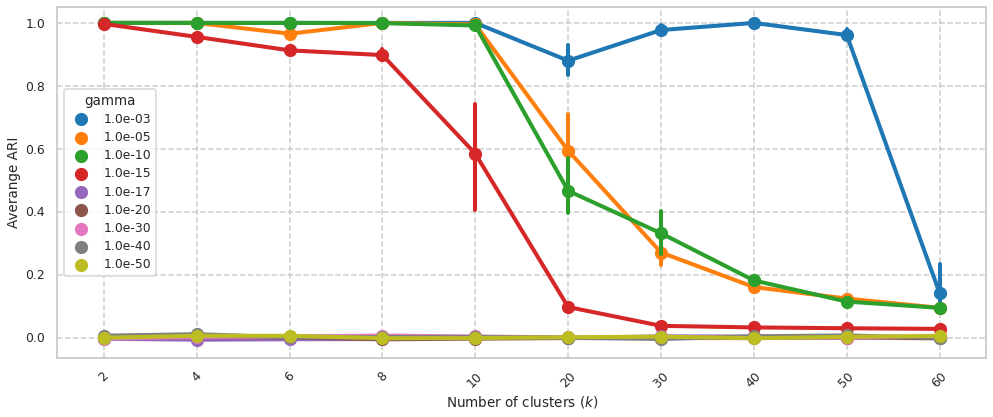

In [63]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="n_clusters", y="ari", hue="gamma")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

**CONCLUSION:** We choose `1e-10` as the `gamma` parameter for this data version.